Advanced PhD course in EEG recording and analysis - EXAM -

In [55]:
import numpy as np
import mne
import matplotlib

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

from mne.preprocessing import ICA
from mne.datasets import sample

from time import time

raw_path = '../../EPFL_Courses/EEG_Analysis/Exam/Recording1/Recording1.vhdr'

# Read input file
raw = mne.io.read_raw_brainvision(raw_path, preload=True)
print(raw)
order = np.arange(raw.info['nchan'])
# raw.plot(n_channels=51, order=order, block=True)

# Read montage file
montage = mne.channels.read_montage(kind='Recording1_mon', path='../../EPFL_Courses/EEG_Analysis/Exam/Recording1/')
# montage.plot(show_names=False)
# fig = montage.plot(kind='3d')
# fig.gca().view_init(azim=70, elev=15)
raw.set_montage(montage, set_dig=True)

# Event triggers and conditions
events = mne.read_events('../../EPFL_Courses/EEG_Analysis/Exam/Recording1/Recording1_vmrk-eve.txt', include=[2,4])#, stim_channel='e204')
#['e1', 'e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15', 'e16', 'e17', 'e18', 'e19', 'e20', 'e21', 'e22', 'e23', 'e24', 'e25', 'e26', 'e27', 'e28', 'e29', 'e30', 'e31', 'e32', 'e33', 'e34', 'e35', 'e36', 'e37', 'e38', 'e39', 'e40', 'e41', 'e42', 'e43', 'e44', 'e45', 'e46', 'e47', 'e48', 'e49', 'e50', 'e51', 'e52', 'e53', 'e54', 'e55', 'e56', 'e57', 'e58', 'e59', 'e60', 'e61', 'e62', 'e63', 'e64', 'e65', 'e66', 'e67', 'e68', 'e69', 'e70', 'e71', 'e72', 'e73', 'e74', 'e75', 'e76', 'e77', 'e78', 'e79', 'e80', 'e81', 'e82', 'e83', 'e84', 'e85', 'e86', 'e87', 'e88', 'e89', 'e90', 'e91', 'e92', 'e93', 'e94', 'e95', 'e96', 'e97', 'e98', 'e99', 'e100', 'e101', 'e102', 'e103', 'e104', 'e105', 'e106', 'e107', 'e108', 'e109', 'e110', 'e111', 'e112', 'e113', 'e114', 'e115', 'e116', 'e117', 'e118', 'e119', 'e120', 'e121', 'e122', 'e123', 'e124', 'e125', 'e126', 'e127', 'e128', 'e129', 'e130', 'e131', 'e132', 'e133', 'e134', 'e135', 'e136', 'e137', 'e138', 'e139', 'e140', 'e141', 'e142', 'e143', 'e144', 'e145', 'e146', 'e147', 'e148', 'e149', 'e150', 'e151', 'e152', 'e153', 'e154', 'e155', 'e156', 'e157', 'e158', 'e159', 'e160', 'e161', 'e162', 'e163', 'e164', 'e165', 'e166', 'e167', 'e168', 'e169', 'e170', 'e171', 'e172', 'e173', 'e174', 'e175', 'e176', 'e177', 'e178', 'e179', 'e180', 'e181', 'e182', 'e183', 'e184', 'e185', 'e186', 'e187', 'e188', 'e189', 'e190', 'e191', 'e192', 'e193', 'e194', 'e195', 'e196', 'e197', 'e198', 'e199', 'e200', 'e201', 'e202', 'e203'])
print(events)

# Set EEG average reference
reference = raw.set_eeg_reference(ref_channels='average', projection=False) 

# Plot Raw data in order to delete completely bad channels
#raw.plot(block = True, n_channels=64, remove_dc=True, events=events) 
#print(raw.info['bads'])

# Filtering
raw.filter (l_freq=0.5, h_freq=45.0)
raw.filter (1., None, n_jobs=1, fir_design='firwin')

# Intermediate step
#raw.plot_psd(tmax=np.inf, fmax=45)
picks = mne.pick_types(raw.info, meg=False, eeg=True)
print(picks)

# Epochs definition
baseline = (-.200, -.100)  # means from the first instant to t = 0
tmin = -0.250
tmax = 0.250
event_id = dict(stim_2=2, stim_4=4)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False, picks=picks, detrend=1,
                    baseline=baseline, preload=True) # Based on signals from Trigger
print(epochs)
print(epochs.event_id)

# baseline noise cov, not a lot of samples
#noise_cov = mne.compute_covariance(epochs, tmax=0., method='shrunk',                                   #verbose='error')
#print(noise_cov)

# Plot whitening process
#evoked = epochs.average()
#evoked.plot_white(noise_cov, time_unit='s')

# Plot & inspect epochs
# scalings = dict(mag=1e-12, grad=4e-11, eeg=50e-6, eog=150e-6, ecg=5e-4,
#      emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1, resp=1, chpi=1e-4,
#      whitened=10.)
# stimuli = mne.pick_events(events, include=[2,4])
# color = {2: 'blue', 4: 'green'}#, 4: 'c', 5: 'black', 32: 'blue'}
# epochs.plot(block=True, scalings=scalings , n_channels=204, n_epochs=1, event_colors=color, events=stimuli)#, noise_cov=noise_cov)#
epochs.drop([7,8,9,45,67,86,99,157,162,163])

# Interpolate bad epochs
mne.Epochs.interpolate_bads(epochs, reset_bads=False, mode='accurate', verbose=False)
print(epochs.info['bads'])

# # Resampling
# epochs_resampled = epochs.copy().resample(250, npad='auto')
# print('New sampling rate:', epochs_resampled.info['sfreq'], 'Hz')

# ICA 
ica = ICA(n_components= 50, method='fastica', random_state=0)
ica.fit(epochs)
ica.plot_sources(epochs, block=True)
print(ica.exclude)
preprocessed = ica.apply(epochs)

#Save output
preprocessed.save('recording1_preprocessed_epo.fif' )


Extracting parameters from ../../EPFL_Courses/EEG_Analysis/Exam/Recording1/Recording1.vhdr...
Setting channel info structure...
Reading 0 ... 180499  =      0.000 ...   180.499 secs...
<RawBrainVision  |  Recording1.eeg, n_channels x n_times : 204 x 180500 (180.5 sec), ~281.3 MB, data loaded>
[[     0      0      4]
 [   500    500      4]
 [  1000   1000      4]
 ...
 [179000 179000      2]
 [179500 179500      4]
 [180000 180000      4]]
Applying average reference.
Applying a custom EEG reference.


<ipython-input-55-e8b65fbac8cd>:16: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw = mne.io.read_raw_brainvision(raw_path, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 6601 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samp

<ipython-input-55-e8b65fbac8cd>:77: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  mne.Epochs.interpolate_bads(epochs, reset_bads=False, mode='accurate', verbose=False)


Selection by number: 50 components
Fitting ICA took 44.5s.
[40]
Transforming to ICA space (50 components)
Zeroing out 1 ICA components
Overwriting existing file.


<ipython-input-55-e8b65fbac8cd>:92: DeprecationWarning: overwrite defaults to True in 0.18 but will change to False in 0.19, set it explicitly to avoid this warning
  preprocessed.save('recording1_preprocessed_epo.fif' )


Reading recording1_preprocessed_epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
350 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
{'stim_2': 2, 'stim_4': 4}


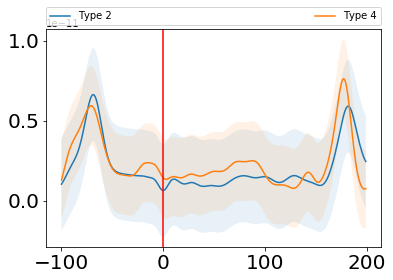

In [70]:
import mne
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')

signal = mne.read_epochs('recording1_preprocessed_epo.fif')
print(signal.event_id)
evoked_2 = signal['stim_2'].average()
evoked_4 = signal['stim_4'].average()
title = 'EEG Average reference'

ev_2 = np.mean(evoked_2.data ** 2, 0)
ev_4 = np.mean(evoked_4.data ** 2, 0)
times = evoked_4.times * 1e3

fig1 = plt.figure()#figsize=(13.0, 15.0))
# ax1 = fig2.add_subplot(2,1,1)
stdev1 = np.std(ev_2)
plt.plot(times[150:450], ev_2[150:450], label='Type 2')
plt.tick_params(labelsize=20)
plt.fill_between(times[150:450], ev_2[150:450]+stdev1, ev_2[150:450]-stdev1, alpha=.1)
stdev2 = np.std(ev_4)
plt.plot(times[150:450], ev_4[150:450], label='Type 4') 
plt.tick_params(labelsize=20)
plt.fill_between(times[150:450], ev_4[150:450]+stdev2, ev_4[150:450]-stdev2, alpha=.1)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.axvline(x=0, color='red')


In [67]:
bads = [print(a) if signal.drop_log[a] == ['USER'] else 0 for a in range(204)]
len(times)

8
9
10
46
68
87
100
158
163
164


501

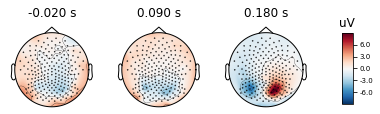

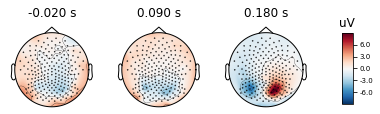

In [77]:
evoked_2.plot_topomap(times=[-.02, 0.09, 0.180], ch_type='eeg')

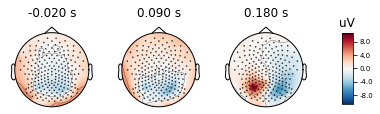

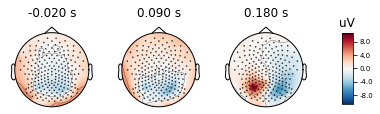

In [78]:
evoked_4.plot_topomap(times=[-.02, 0.09, 0.180], ch_type='eeg')

    Using multitaper spectrum estimation with 7 DPSS windows


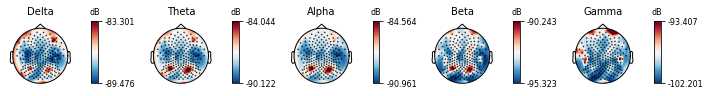

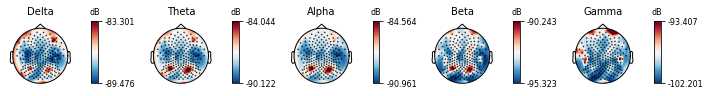

In [79]:
signal['stim_2'].plot_psd_topomap()

    Using multitaper spectrum estimation with 7 DPSS windows


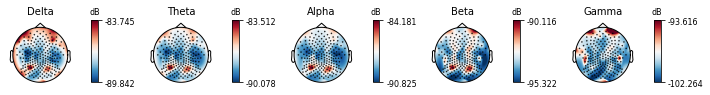

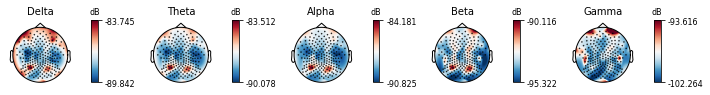

In [80]:
signal['stim_4'].plot_psd_topomap()

Reading recording1_preprocessed_epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
350 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    8.8s
[Parallel(n_jobs=4)]: Done 158 tasks      | elapsed:   19.7s


Applying baseline correction (mode: zscore)


[Parallel(n_jobs=4)]: Done 204 out of 204 | elapsed:   25.2s finished


Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)


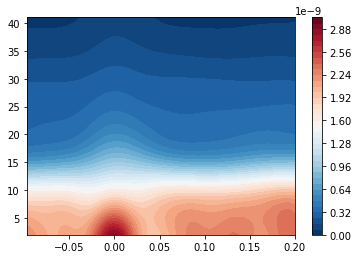

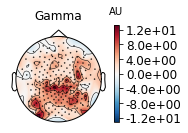

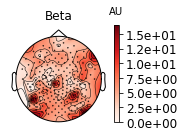

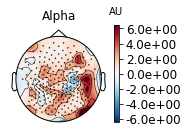

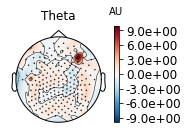

In [92]:
import mne
import numpy as np
from mne.stats import _bootstrap_ci
from mne.baseline import rescale
import matplotlib
import matplotlib.pyplot as plt
from mne.time_frequency import tfr_morlet, psd_multitaper
from matplotlib.ticker import MaxNLocator

signal = mne.read_epochs('recording1_preprocessed_epo.fif')

# define frequencies of interest (log-spaced)
cwt_freqs = [i for i in range(2,42,1)]
cwt_n_cycles = [j / 5 for j in cwt_freqs]  # different number of cycle per frequency
power, itc = tfr_morlet(signal['stim_2'], freqs=cwt_freqs, n_cycles=cwt_n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=4)

vector = np.mean(power.data, 0)
                 
vmax=3e-9
vmin=0
levels = MaxNLocator(nbins=40).tick_values(vmin, vmax)
CS = plt.contourf(power.times[51:151], power.freqs, vector[:,51:151], cmap='RdBu_r', levels=levels)
cbar = plt.colorbar(CS)


# fig, axis = plt.subplots(4, 1)
power.plot_topomap(ch_type='eeg', tmin=-0.1, tmax=0.2, fmin=26, fmax=45,
                   baseline=(-0.2, -0.1), mode='zscore',
                   title='Gamma', show=True)
power.plot_topomap(ch_type='eeg', tmin=-0.1, tmax=0.2, fmin=13, fmax=25,
                   baseline=(-0.2, -0.1), mode='zscore',
                   title='Beta', show=True)
power.plot_topomap(ch_type='eeg', tmin=-0.1, tmax=0.2, fmin=8, fmax=12,
                   baseline=(-0.2, -0.1), mode='zscore',
                   title='Alpha', show=True)
power.plot_topomap(ch_type='eeg', tmin=-0.1, tmax=0.2, fmin=3, fmax=7,
                   baseline=(-0.2, -0.1), mode='zscore',
                   title='Theta', show=True)
# mne.viz.tight_layout()
plt.show()

Reading recording1_preprocessed_epo.fif ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
350 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    8.2s
[Parallel(n_jobs=4)]: Done 158 tasks      | elapsed:   19.0s


Applying baseline correction (mode: zscore)


[Parallel(n_jobs=4)]: Done 204 out of 204 | elapsed:   24.5s finished


Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)
Applying baseline correction (mode: zscore)


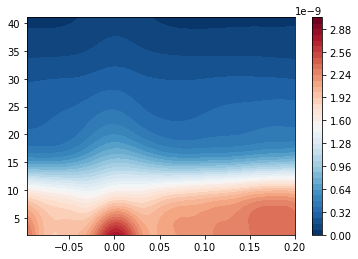

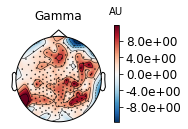

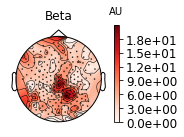

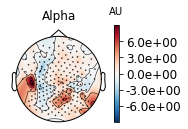

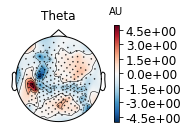

In [93]:
import mne
import numpy as np
from mne.stats import _bootstrap_ci
from mne.baseline import rescale
import matplotlib
import matplotlib.pyplot as plt
from mne.time_frequency import tfr_morlet, psd_multitaper

signal = mne.read_epochs('recording1_preprocessed_epo.fif')

# define frequencies of interest (log-spaced)
cwt_freqs = [i for i in range(2,42,1)]
cwt_n_cycles = [j / 5 for j in cwt_freqs]  # different number of cycle per frequency
power, itc = tfr_morlet(signal['stim_4'], freqs=cwt_freqs, n_cycles=cwt_n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=4)

vector = np.mean(power.data, 0)
                 
vmax=3e-9
vmin=0
levels = MaxNLocator(nbins=40).tick_values(vmin, vmax)
CS = plt.contourf(power.times[51:151], power.freqs, vector[:,51:151], cmap='RdBu_r', levels=levels)
cbar = plt.colorbar(CS)

# fig, axis = plt.subplots(4, 1)
power.plot_topomap(ch_type='eeg', tmin=-0.1, tmax=0.2, fmin=26, fmax=45,
                   baseline=(-0.2, -0.1), mode='zscore',
                   title='Gamma', show=True)
power.plot_topomap(ch_type='eeg', tmin=-0.1, tmax=0.2, fmin=13, fmax=25,
                   baseline=(-0.2, -0.1), mode='zscore',
                   title='Beta', show=True)
power.plot_topomap(ch_type='eeg', tmin=-0.1, tmax=0.2, fmin=8, fmax=12,
                   baseline=(-0.2, -0.1), mode='zscore',
                   title='Alpha', show=True)
power.plot_topomap(ch_type='eeg', tmin=-0.1, tmax=0.2, fmin=3, fmax=7,
                   baseline=(-0.2, -0.1), mode='zscore',
                   title='Theta', show=True)
# mne.viz.tight_layout()
plt.show()

RECORDING 2

In [1]:
import numpy as np
import mne
import matplotlib

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

from mne.preprocessing import ICA
from mne.datasets import sample

from time import time

raw_path = '../../EPFL_Courses/EEG_Analysis/Exam/Recording2/Recording_2.vhdr'

# Read input file
raw = mne.io.read_raw_brainvision(raw_path, preload=True)
print(raw)
order = np.arange(raw.info['nchan'])
raw.plot(n_channels=32, order=order, block=True)

# Read montage file
montage = mne.channels.read_montage(kind='easycap_64')
#print(montage)
raw.set_montage(montage, set_dig=True)

# Set EEG average reference
reference = raw.set_eeg_reference(ref_channels='average', projection=False) 

# Filtering
raw.filter (l_freq=0.5, h_freq=45.0)
raw.filter (1., None, n_jobs=1, fir_design='firwin')

# Intermediate step
#raw.plot_psd(tmax=np.inf, fmax=45)
picks = mne.pick_types(raw.info, meg=False, eeg=True)
print(picks)

# Epochs definition
# baseline = (-.300, -.100)  # means from the first instant to t = 0
# tmin = -1.5
# tmax = 1.5
# epochs = mne.Epochs(raw, tmin, tmax, proj=False, event_id=None, picks=picks, detrend=1,
#                     baseline=baseline, preload=True) # Based on signals from Trigger
# print(epochs)
# print(epochs.event_id)

n_epochs=10
Fs = raw.info['sfreq']
rdata = raw.get_data()
events = np.array([[int(i*rdata.shape[1]/n_epochs), 0, 1] for i in range(n_epochs)])
epochs = mne.Epochs(raw, events, 1, 0, 2.5, proj=True, picks=picks, preload=True)
print(epochs)
epochs_data = epochs.get_data()
print(epochs_data.shape)

# Plot & inspect epochs
scalings = dict(mag=1e-12, grad=4e-11, eeg=50e-6, eog=150e-6, ecg=5e-4,
     emg=1e-3, ref_meg=1e-12, misc=1e-3, stim=1, resp=1, chpi=1e-4,
     whitened=10.)
epochs.plot(block=True, scalings=scalings , n_channels=64, n_epochs=1)#, noise_cov=noise_cov)#
# epochs.drop([7,8,9,45,67,86,99,157,162,163])

# Interpolate bad epochs
# mne.Epochs.interpolate_bads(epochs, reset_bads=False, mode='accurate', verbose=False)
# print(epochs.info['bads'])

# # Resampling
# epochs_resampled = epochs.copy().resample(250, npad='auto')
# print('New sampling rate:', epochs_resampled.info['sfreq'], 'Hz')

# ICA 
ica = ICA(method ='fastica', random_state=0)
ica.fit(epochs)
ica.plot_sources(epochs, block=True)
print(ica.exclude)
preprocessed = ica.apply(epochs)

#Save output
preprocessed.save('recording2_preprocessed_epo.fif' )


Extracting parameters from ../../EPFL_Courses/EEG_Analysis/Exam/Recording2/Recording_2.vhdr...
Setting channel info structure...
Reading 0 ... 6890  =      0.000 ...    27.560 secs...
<RawBrainVision  |  Recording_2.eeg, n_channels x n_times : 64 x 6891 (27.6 sec), ~3.5 MB, data loaded>
Applying average reference.
Applying a custom EEG reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR f

<ipython-input-1-564716e50406>:24: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['CPz', 'Ref']. Their position has been left untouched.
  raw.set_montage(montage, set_dig=True)


<Epochs  |   10 events (all good), 0 - 2.5 sec, baseline [None, 0], ~3.2 MB, data loaded,
 '1': 10>
(10, 64, 626)
Dropped 0 epochs
Channels marked as bad: []
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 64
Fitting ICA took 2.8s.
[]
Transforming to ICA space (64 components)
Zeroing out 0 ICA components
Overwriting existing file.


<ipython-input-1-564716e50406>:79: DeprecationWarning: overwrite defaults to True in 0.18 but will change to False in 0.19, set it explicitly to avoid this warning
  preprocessed.save('recording2_preprocessed_epo.fif' )


In [13]:
int(0.9*(rdata.shape[1]/n_epochs)/Fs)
int((rdata.shape[1]/Fs/10)*0.9)

2

Reading recording2_preprocessed_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2500.00 ms
        0 CTF compensation matrices available
10 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Not setting metadata


[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    0.5s finished


<class 'mne.time_frequency.tfr.EpochsTFR'>
(10, 64, 40, 209)
(10, 40, 209)


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Applying baseline correction (mode: zscore)


[Parallel(n_jobs=4)]: Done  64 out of  64 | elapsed:    0.5s finished


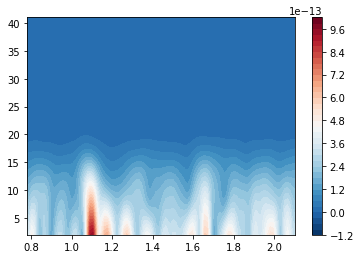

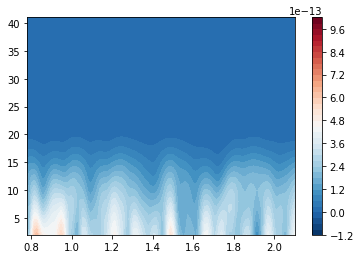

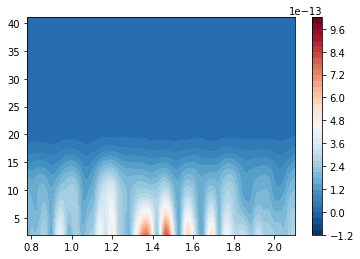

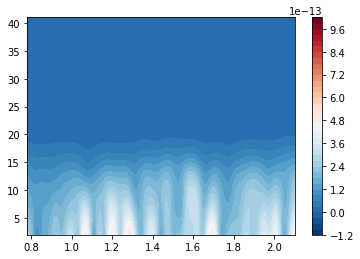

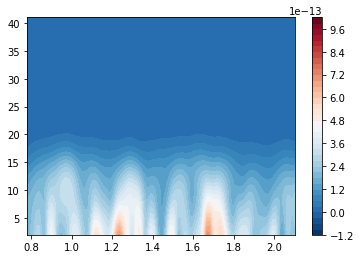

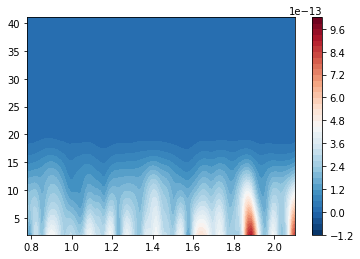

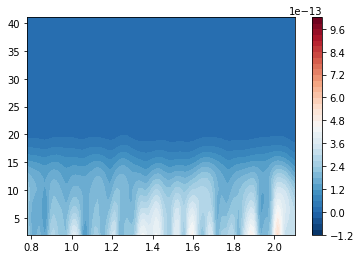

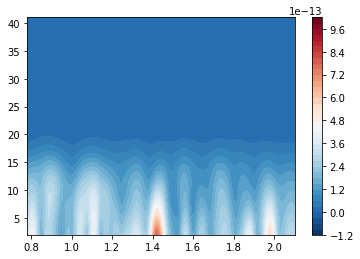

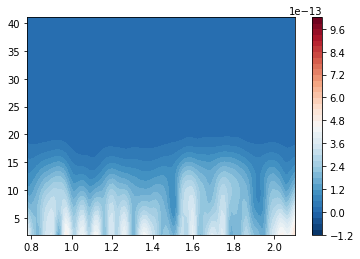

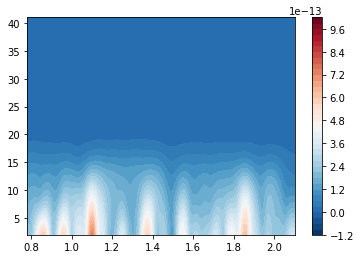

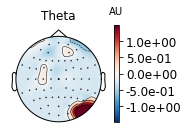

Applying baseline correction (mode: zscore)


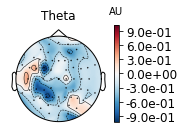

Applying baseline correction (mode: zscore)


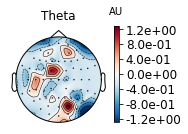

Applying baseline correction (mode: zscore)


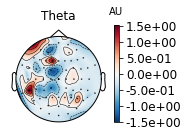

Applying baseline correction (mode: zscore)


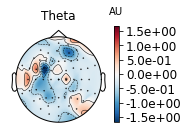

In [36]:
import mne
import numpy as np
from mne.stats import _bootstrap_ci
from mne.baseline import rescale
import matplotlib
import matplotlib.pyplot as plt
from mne.time_frequency import tfr_morlet, psd_multitaper
from matplotlib.ticker import MaxNLocator

signal = mne.read_epochs('recording2_preprocessed_epo.fif')

# define frequencies of interest (log-spaced)
cwt_freqs = [i for i in range(2,42,1)]
cwt_n_cycles = [j / 5 for j in cwt_freqs]  # different number of cycle per frequency
power= tfr_morlet(signal, freqs=cwt_freqs, n_cycles=cwt_n_cycles, use_fft=True,
                        return_itc=False, decim=3, n_jobs=4, average=False)

print(type(power))
print(power.data.shape)
vector = np.mean(power.data, 1)
print(vector.shape)
                 
vmax=1e-12
vmin=-0.1e-12
levels = MaxNLocator(nbins=40).tick_values(vmin, vmax)
for i in range(10):
    plt.figure(i)
    CS = plt.contourf(power.times[65:176], power.freqs, vector[i,:,65:176], cmap='RdBu_r', levels=levels)
    cbar = plt.colorbar(CS)

# define frequencies of interest (log-spaced)
cwt_freqs = [i for i in range(2,42,1)]
cwt_n_cycles = [j / 5 for j in cwt_freqs]  # different number of cycle per frequency
pwr, itc = tfr_morlet(signal, freqs=cwt_freqs, n_cycles=cwt_n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=4, average=True)

# fig, axis = plt.subplots(4, 1)
pwr.plot_topomap(ch_type='eeg', tmin=1.1, tmax=1.15, fmin=26, fmax=45,
                   baseline=(0, 0.75), mode='zscore',
                   title='Theta', show=True)
pwr.plot_topomap(ch_type='eeg', tmin=1.3, tmax=1.5, fmin=13, fmax=25,
                   baseline=(0, 0.75), mode='zscore',
                   title='Theta', show=True)
pwr.plot_topomap(ch_type='eeg', tmin=1.2, tmax=1.3, fmin=3, fmax=7,
                   baseline=(0, 0.75), mode='zscore',
                   title='Theta', show=True)
pwr.plot_topomap(ch_type='eeg', tmin=1.85, tmax=1.9, fmin=8, fmax=12,
                   baseline=(0, 0.75), mode='zscore',
                   title='Theta', show=True)
pwr.plot_topomap(ch_type='eeg', tmin=1.4, tmax=1.45, fmin=13, fmax=25,
                   baseline=(0, 0.75), mode='zscore',
                   title='Theta', show=True)

# mne.viz.tight_layout()
plt.show()

In [15]:
len(power.times)
power.times[65:176]

array([0.78 , 0.792, 0.804, 0.816, 0.828, 0.84 , 0.852, 0.864, 0.876,
       0.888, 0.9  , 0.912, 0.924, 0.936, 0.948, 0.96 , 0.972, 0.984,
       0.996, 1.008, 1.02 , 1.032, 1.044, 1.056, 1.068, 1.08 , 1.092,
       1.104, 1.116, 1.128, 1.14 , 1.152, 1.164, 1.176, 1.188, 1.2  ,
       1.212, 1.224, 1.236, 1.248, 1.26 , 1.272, 1.284, 1.296, 1.308,
       1.32 , 1.332, 1.344, 1.356, 1.368, 1.38 , 1.392, 1.404, 1.416,
       1.428, 1.44 , 1.452, 1.464, 1.476, 1.488, 1.5  , 1.512, 1.524,
       1.536, 1.548, 1.56 , 1.572, 1.584, 1.596, 1.608, 1.62 , 1.632,
       1.644, 1.656, 1.668, 1.68 , 1.692, 1.704, 1.716, 1.728, 1.74 ,
       1.752, 1.764, 1.776, 1.788, 1.8  , 1.812, 1.824, 1.836, 1.848,
       1.86 , 1.872, 1.884, 1.896, 1.908, 1.92 , 1.932, 1.944, 1.956,
       1.968, 1.98 , 1.992, 2.004, 2.016, 2.028, 2.04 , 2.052, 2.064,
       2.076, 2.088, 2.1  ])

In [ ]:
import numpy as np
import scipy
import mne
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from scipy import fft, ifft, arange
from mne.datasets import spm_face
from mne.minimum_norm import make_inverse_operator, apply_inverse_epochs, compute_source_psd_epochs, source_band_induced_power, source_induced_power
from mne import io, combine_evoked
from mayavi import mlab
from surfer import Brain  # noqa
from mne.source_space import read_source_spaces, SourceSpaces
from mne.connectivity import spectral_connectivity, seed_target_indices
from mne.viz import circular_layout, plot_connectivity_circle

import time
# %gui qt

t = time.time()

signal1 = mne.read_epochs('/home/robertofelipe_sg/Documents/Preprocessed/P32_Bsl_preprocessed_epo.fif')
signal = mne.read_epochs('recording2_preprocessed_epo.fif')

signal.info = signal1.info

signal.set_eeg_reference('average', projection=True)
signal.apply_proj()

noise_cov = mne.compute_covariance(signal, tmax=0, method='shrunk')

data_path = spm_face.data_path()                    
subjects_dir = data_path + '/subjects'
subject = 'spm'

# BEM = Triangulations of the interfaces between different tissues --> Freesurfer
# Inner skull, outer skull, skin
bem = data_path + '/subjects/spm/bem/spm-5120-5120-5120-bem-sol.fif'  
# mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir, brain_surfaces='white', orientation='coronal')

# Src = spacing='oct6' --> 4098 sources per hemisphere + Area 24 mm^2
src = data_path + '/subjects/spm/bem/spm-oct-6-src.fif' 
srcx = read_source_spaces(src)
# mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir, brain_surfaces='white', src=src, orientation='coronal')

# Computing forward solution
forward = mne.make_forward_solution(signal.info, None, src, bem, eeg=True)
# Accesing Np array that contains info about dipoles and sensors
leadfield = forward['sol']['data']
print("Leadfield size : %d sensors x %d dipoles" % leadfield.shape)

# Parameters to compute the inverse solution
snr = 3.0
lambda2 = 1.0 / snr ** 2
method = 'MNE'
inverse_operator = make_inverse_operator(signal.info, forward, noise_cov, loose=0.2, depth=0.8)

# Compute inverse solution on signal
stc = apply_inverse_epochs(signal, inverse_operator, lambda2, method)#, pick_ori='vector')
#print(type(stc))
#print(stc.shape)

# Visualize source points of left hemisphere
# brain = Brain('spm', 'lh', 'inflated', subjects_dir=subjects_dir)
# surfr = brain.geo['lh']
# vertidx = np.where(srcx[0]['inuse'])[0]
# mlab.points3d(surfr.x[vertidx], surfr.y[vertidx], surfr.z[vertidx], color=(1, 1, 0), scale_factor=1.5)

# #stc.save('spm_%s_dSPM_inverse' % contrast.comment)

# Plot contrast in 3D with PySurfer if available
# brain = stc.plot(hemi='both', initial_time=0.0, subjects_dir=subjects_dir,
#                 views=['ven'], clim={'kind': 'value', 'lims': [0., 6., 10.]})
# brain.save_image('dSPM_map.png')

# Compute a source estimate per frequency band
# bands = dict(alpha=[7, 13], beta=[14, 29], gamma=[30, 45])

# stcs = source_band_induced_power(signal, inverse_operator, bands, n_cycles=3,
#                                  use_fft=True, n_jobs=1)

# print(stcs.items)

# for b, stc in stcs.items():
#     stc.save('pwr_%s' % b, ftype='h5')
    
# Frequencies of interest + Wavelet cycles for e/freq
fmin = 2.
fmax = 42.
numf = 40
sfreq = 250  # Sampling frequency
cwt_freqs = np.linspace(fmin,fmax,numf)
cwt_n_cycles = [j / 5 for j in cwt_freqs]
    
# power = np.empty((len(names), numf, num_time))

pwr, plv = source_induced_power(signal, inverse_operator, cwt_freqs, label=None, method='MNE',
                            n_cycles=cwt_n_cycles, baseline=(0,0.75),
                            baseline_mode='zscore', n_jobs=4) # srcs x time x freqs
# power[l,:,:] = np.mean(pwr, axis=0)  # average over sources

# roi_pwr = np.mean(power, axis=0) # average over broadmann areas ROI ????

# np.save('Pwr_%s_%s' %(name, numb), roi_pwr)

Reading /home/robertofelipe_sg/Documents/Preprocessed/P32_Bsl_preprocessed_epo.fif ...
    Found the data of interest:
        t =   -1500.00 ...    1496.00 ms
        0 CTF compensation matrices available
139 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Reading recording2_preprocessed_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    2500.00 ms
        0 CTF compensation matrices available
10 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Computing data rank from raw with rank=None
    Using tolerance 6.1e-14 (2.2e-16 eps * 10 dim * 27  max singula

<ipython-input-16-dcc5118c917c>:30: RuntimeWarning: Too few samples (required : 310 got : 10), covariance estimate may be unreliable
  noise_cov = mne.compute_covariance(signal, tmax=0, method='shrunk')


Done.
Number of samples used : 10
[done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
Source space          : /home/robertofelipe_sg/mne_data/MNE-spm-face/subjects/spm/bem/spm-oct-6-src.fif
MRI -> head transform : identity
Measurement data      : instance of Info
Conductor model   : /home/robertofelipe_sg/mne_data/MNE-spm-face/subjects/spm/bem/spm-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Reading /home/robertofelipe_sg/mne_data/MNE-spm-face/subjects/spm/bem/spm-oct-6-src.fif...
Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     1.000000  0.000000  0.000000       0.00 mm
     0.000000  1.00

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [38]:
from mne.datasets import spm_face
from mayavi import mlab
from surfer import Brain  # noqa
data_path = spm_face.data_path()   
subjects_dir = data_path + '/subjects'
brain = stcs['beta'].plot('spm', initial_time=0, time_viewer=1, subjects_dir=subjects_dir, hemi='both')

Using control points [0.0286877  0.17361104 1.03282272]


In [36]:
stcs['beta'].data.shape

(8196, 501)